In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.stats import distributions
from scipy.optimize import minimize
from scipy.optimize import curve_fit

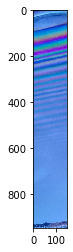

In [5]:
pic = mpimg.imread('IMG_2163 (2).jpg')
plt.imshow(pic)
plt.show()

In [6]:
pic.shape

(949, 146, 3)

So there are 77cos(theta-c) mm per 949 pixels

0.00799 mm/pxl

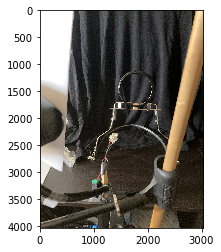

In [7]:
setup = mpimg.imread('IMG_2168.jpg')
plt.imshow(setup)
plt.show()

Here is a photo of the setup with the lights on. The mic stand/pool cue rig is in lieu of a tripod for my camera. This way I can fix the orientation of the camera, and keep it at a consistent position for multiple pictures. 

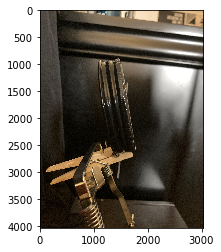

In [8]:
angle = mpimg.imread('IMG_2167.jpg')
plt.imshow(angle)
plt.show()

This is a side profile of the film. You can just barely see the thin line of duct tape that I put on the wall behind it so that I can measure the angle. As mentioned in my notebook, the angle is 10 degrees +/- 1 degree. 

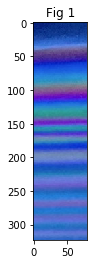

In [356]:
img = mpimg.imread('IMG_2165zoned.jpg')
img.shape
plt.imshow(img)
plt.title('Fig 1')
plt.show()

I cropped the jpeg of my film down to a ~60 pixel wide region. The black part on the top is where the film's thickness is in the sub-wavelength regime, and we don't have reflection because all the light transmits. 


In [89]:
x = np.linspace(0, 25.8, 323)
a=46
r = img[:, a, 0]
g = img[:, a, 1]
b = img[:, a, 2]

In [90]:
rdata = np.column_stack([x,r])
gdata = np.column_stack([x,g])
bdata = np.column_stack([x,b])

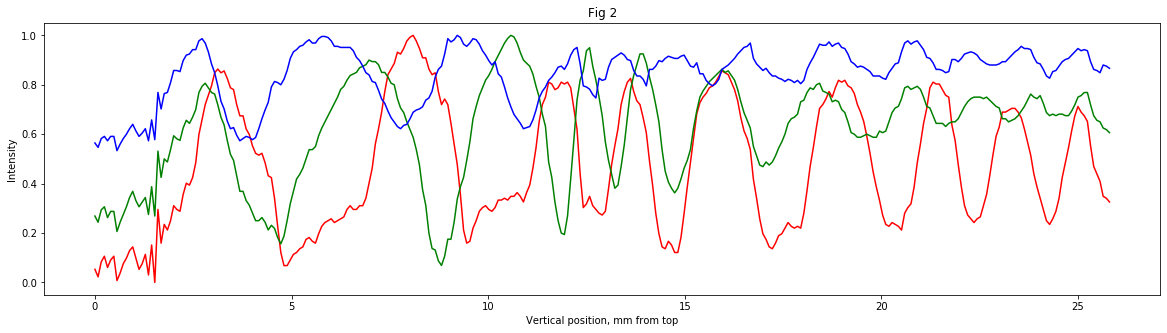

In [355]:
plt.figure(figsize=(20,5))
plt.plot(rdata[:,0], (rdata[:,1]/np.max(rdata[:,1])), 'r')
plt.plot(gdata[:,0], (gdata[:,1]/np.max(gdata[:,1])), 'g')
plt.plot(bdata[:,0], (bdata[:,1]/np.max(bdata[:,1])), 'b')
plt.xlabel('Vertical position, mm from top')
plt.title('Fig 2')
plt.ylabel('Intensity')
plt.show()

### Comments on raw data
The first twenty pixels of the RGB data is to show the region of the bubble where the thickness is less than a wavelength thick. Since the curves pretty clearly start out in phase with eachother, we know that the film was fully illuminated by the white paper and this first fringe isn't due to a setup error. Also, the intensity of blue light dominates the ratios of RBG, 



### Method to estimate thickness
The method for extracting the film thickness is as follows. We can order each red intensity fringe as q0, q1,..,q9. We know these fringes (minima) occur when cos(phi)=1, meaning that d = q*pi/(k*cos(theta)). So each minima on the intensity graph, we have a map to its location from the top of the ring. 


I will estimate the range at which the minima occurs in order to pull out each minima location. Due to the scaling of my pixels to mm, and to simplify indexing my arrays I will use the array in terms of pixels. 

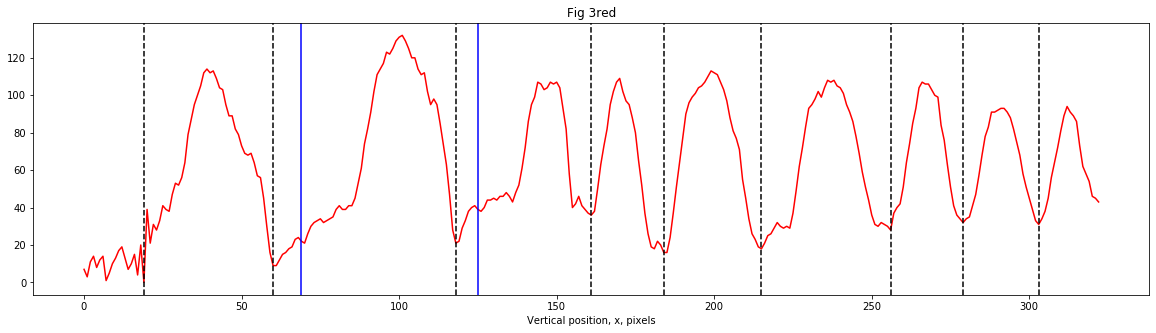

In [335]:
plt.figure(figsize=(20,5))
plt.plot(r, 'r')
rpixel = [19, 60,  118, 161, 184, 215, 256, 279, 303]
for xc in rpixel:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.axvline(x=69, color='b')
plt.axvline(x=125, color='b')
plt.title('Fig 3red')
plt.xlabel('Vertical position, x, pixels')
plt.show()

Red: Indicies: 19, 60, 118, 161, 184, 215, 256, 279, 303

In [ ]:
np.argmin(r[285:320])

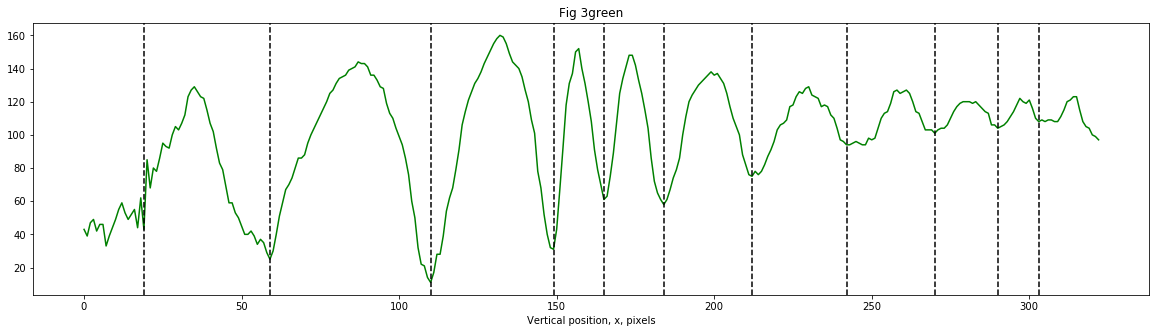

In [334]:
plt.figure(figsize=(20,5))
plt.plot(g, 'g')
gpixel = [19, 59, 110, 149, 165, 184, 212, 242, 270, 290, 303]
for xc in gpixel:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.title('Fig 3green')
plt.xlabel('Vertical position, x, pixels')
plt.show()

Green indicies: 19 (by def), 59, 110, 149, 165, 184, 212, 242, 270, 290, 303

In [194]:
np.argmin(g[300:315])

3

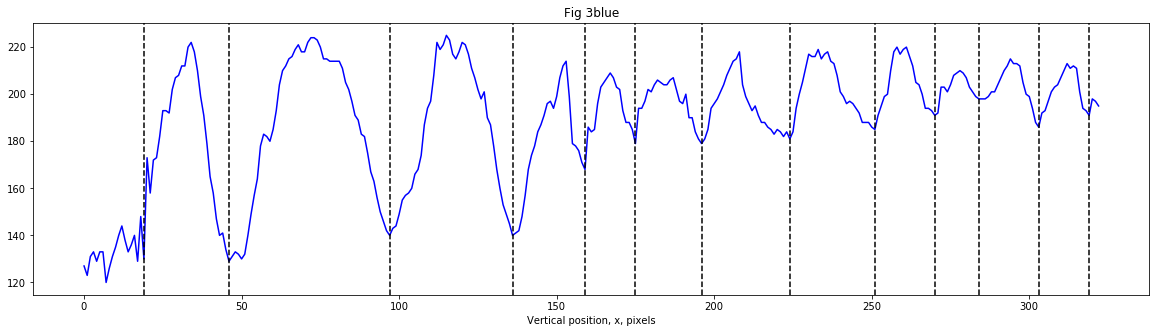

In [336]:
plt.figure(figsize=(20,5))
plt.plot(b, 'b')
bpixel = [19, 46, 97, 136, 159, 175, 196, 224, 251, 270, 284, 303, 319]
for xc in bpixel:
    plt.axvline(x=xc, color='k',linestyle='--')
plt.title('Fig 3blue')
plt.xlabel('Vertical position, x, pixels')
plt.show()

Blue Indicies: 19, 46, 97, 136, 159, 175, 196, 224, 251, 270, 284, 303, 319

In [190]:
np.argmin(b[310:323])

9

### Minima locations, error discussion

I used the argmin function to find the location of the obvious minimum on a specified range 'by hand' (meaning I didn't come up with a recursive method for this part). As expected in the model, blue had the most minima and red had the least. A limitation of this procedure is that the data is noisy and not sampled precisely enough to really find the fringe location of rgb intensities. Looking at Fig 3a, the 2nd order minima is clearly offset to the left from where a cosine wave would fit. This can be attributed to a camera/picture limitation.

A future version of this project would involve taking a photograph from a distance where I could scale up the pixel count. Since pyplot's image processing will attribute an RBG array to each pixel, this would allow me to have more points per mm on the soap film. 

I added blue lines to Fig 3a, which should be viewed as my "eye test" of where the minima WOULD be with regards to the functional form the model predicts. Clearly there is an image processing issue happening here with the camera that is unaccounted for in the model. To adress the uncertainty asscoiated with this phenomena, I found that the greatest discrepancy between predicted fringe location and the location from the data was 9 pixels (0.63mm) on the red data. We know that since red light has the highest wavelength, its period of oscillation on these graphs will be the longest, and therefore the hardest to pinpoint a minima on. We can identify these offset fringe locations as systematic error attributed to the camera sampling. 

Most blatant discrepancies in minima location appears to be an underestimate of x in Fig 3red, except for (q7) on Fig 3green and (q7,q8) on Fig 3blue. Thus, we have another potential area of systematic error with the image processing in my iPhone camera. Building a model of this uncertainty is outside the scope of this class, so for the vertical postion(x) uncertainty I will assign error_x = 0.63mm. This is the maximum uncertainty on the least precise (red) data, so the reader should just think of it as a general upper bound. See figure 4 below for x vs d plot with vertical bars in x directions.  Each error bar in x represents 2.5% of the full range, which is a decently small, so for whatever x vs d relationship we see it should be independent of this systematic uncertainty. 



In [303]:
a = 1/(2*1.33*np.cos(0.133))
r_wav = 620e-9
g_wav = 520e-9
b_wav = 460e-9
def d(wav, q):
    return a*q*wav
qr = [0,1,2,3,4,5,6,7,8]
qg = [0,1,2,3,4,5,6,7,8,9,10]
qb = [0,1,2,3,4,5,6,7,8,9,10,11,12]

In [374]:
r_d = [0, 2.3515951096968524e-07, 
       4.703190219393705e-07, 7.054785329090558e-07,
      9.40638043878741e-07, 1.1757975548484262e-06,
      1.4109570658181116e-06, 1.6461165767877967e-06,
      1.881276087757482e-06]
g_d = [0, 1.9723055758747795e-07, 
      3.944611151749559e-07, 5.916916727624339e-07,
      7.889222303499118e-07, 9.861527879373897e-07, 
      1.1833833455248678e-06, 1.3806139031123457e-06,
      1.5778444606998236e-06, 1.7750750182873015e-06,
      1.9723055758747794e-06]
b_d = [0, 1.7447318555815356e-07, 
      3.4894637111630713e-07, 5.234195566744607e-07,
      6.978927422326143e-07, 8.723659277907678e-07, 
      1.0468391133489214e-06, 1.221312298907075e-06,
      1.3957854844652285e-06, 1.570258670023382e-06,
      1.7447318555815356e-06, 1.9192050411396894e-06,
      2.093678226697843e-06]
rmm = [a*0.0799 for a in rpixel]
gmm = [b*0.0799 for b in gpixel]
bmm = [c*0.0799 for c in bpixel]


d_r = np.column_stack([rmm, r_d])
d_g = np.column_stack([gmm, g_d])
d_b = np.column_stack([bmm, b_d])
data = np.concatenate((d_r, d_g, d_b), axis=0)

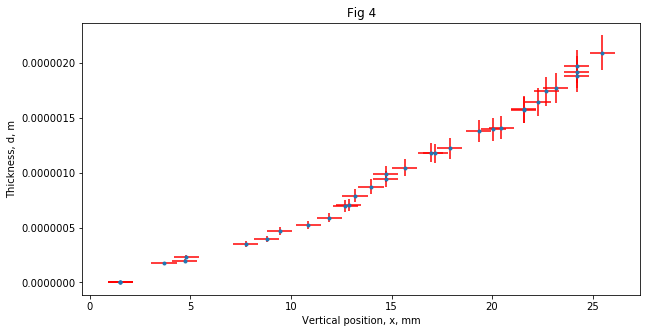

In [375]:
d_err = data[:,1]*0.0759
plt.figure(figsize=(10,5))
plt.plot(data[:,0], data[:,1], '.')
plt.errorbar(data[:,0], data[:,1], yerr = d_err, xerr = 0.63, ls='none', color='r') 
plt.title('Fig 4')
plt.xlabel('Vertical position, x, mm')
plt.ylabel('Thickness, d, m')
plt.show()

### Comments on thickness characteristic before fitting

The data is nonlinear, and looks quadratic. This assertion is strenghtened if you consider low order minima that the data showed to be closer to the top of the ring in vertical position. Moving these data points in +x direction slightly would enhance quadratic appearance, so I have confidence in modeling the thickness this way. 

Justification for x direction error bars was given in the previous comment section above. To characterize uncertainty in d, we use the general uncertainty equation for d = q*pi/(k*cos(theta)).

Using the special case:
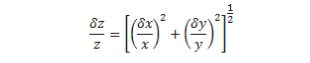

And for the sake of time associated with reshaping my data to assign perfectly accurate uncertainty, I will use a few approximations. Since blue has shorter wavelength than red, the ratio of its uncertainty to real value in the eqation will be greater than that of reds. As with the last uncertainty characterizations, I will use the upper bound and pick the values that result in maximum uncertainty. 

(uncert_d)/d = 0.0759 , see fig 4 to see the scaling of this ratio against the data. Note that this basically allocates zero uncertainty to the d=0 point. From the physics discussed earlier, this is just the subwavelength regime where we can't determine the thickness with these tools.  

In [376]:
data.sort(axis=0)
def thickness_func(x, a, b, c):
    return a*x**2 + b*x + c
popt, pcov = curve_fit(thickness_func, data[:,0], data[:,1])
popt

array([ 1.68426054e-09,  4.02509022e-08, -4.93264465e-08])

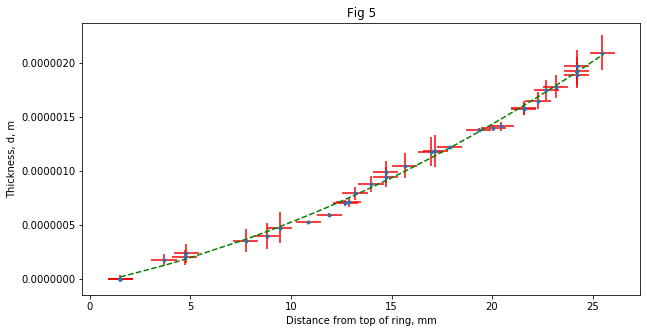

In [379]:
plt.figure(figsize=(10,5))
plt.plot(data[:,0], thickness_func(data[:,0], *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(data[:,0], data[:,1], '.')
plt.errorbar(data[:,0], data[:,1], yerr = d_err, xerr = 0.63, ls='none', color='r') 
plt.title('Fig 5')
plt.xlabel('Distance from top of ring, mm')
plt.ylabel('Thickness, d, m')
plt.show()

### Fitted data comments

The quadratic fit looks excellent against the data, I'm not sure what happened to my error bars but they should be consistent with figure 4 and I will fix this later. 

My model for the thickness of the bubble shows a quadratic relationship as you move down from the top of the ring. The main area of this analysis section that could be improved is fitting my original data to the model equation for R (10.13 of Steck). This would really solidify the credibility of using the relationship d = qpi/(kcos(theta)) to identify the thickness of the bubble. The other important thing about fitting Steck 10.13 over Fig 3 is that allow me to reconcile my method of finding minima location with the model prediction of where those would be. When I estimated max uncertainty to be dx=0.63mm for location, this would be improved by having a function that reveals the discrepancy between model and data; rather than my qualitative assesment of the discrepancy between data and where I "eyeball" the oscillating function to have a minima. 

Since there is no conventional value or model for bubble thickness, I do not provide a percent difference from known values. I will say that the d vs x characteristic that I found is quite similar to that of the Afanasyev paper. Though they don't apply a curve fit, and likely have different morphology with hemispherical bubbles, the results are fairly consistent. 